In [5]:
import torch
import numpy as np
import os
import sys

In [6]:
sys.path = [
    '..',
    '../src',
    '../.venv/Lib/site-packages'
]

In [3]:
# import sys
# if 'src' not in sys.path:
#     sys.path.append('src')
# import os
# os.getcwd()

In [7]:
import pkgutil
search_path = None # Используйте None, чтобы увидеть все модули, импортируемые из sys.path
all_modules = [x[1] for x in pkgutil.iter_modules(path=search_path)]
assert 'fish_algo' in all_modules, "Wrong packages setup"

### генерация упрощённого искусственного спектра

In [8]:
x = torch.tensor(np.linspace(-10, 10, 1000))
x0= torch.tensor([.1, 5, -9, -1, 9])
ws = torch.tensor([0.5, 1, 0.5, 2, 0.25])
amp = torch.tensor([1, 4, 6, 9, 0.8])
gau = torch.tensor([0.5, .5, 1, 0, 0.25])

# idx = x0.sort().indices
# for array in [ws, amp, gau]:
#     array[:] = array[idx]



In [9]:
import importlib
import miscellaneous as misc
import fish_algo as fish_algo

importlib.reload(misc)
importlib.reload(fish_algo)

from spectrum import Spectrum

import matplotlib.pyplot as plt
data = misc.voigt_(x, amp, ws, x0, gau, True)
# plt.plot(data.tolist())

spc = Spectrum(
    x, data
)
simple_boundaries = {'amp': (0, 10),
     'w': (0, 4),
     'x0': spc.wavenums[[0, -1]],
     'gau': (0, 1)
    }

dec = fish_algo.Deconvolutor(spc, 750, boundaries=None, mse_transform='neg',
                             p=2,
                             opt_params={'step_vol': 0.1, 'step_ind': .1, 
                                         'explorators_prop': 0.005},
                             pos_range=0.05, 
                             scheduler_regime='no_change', checkout='best',
                             scheduler_sch={
                                'init_step_vol': 0.955,
                                'init_step_ind': 0.91
                             }, each_n=2, memory=5
                             )


In [279]:
dec.run(100)

Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

<Axes: title={'center': 'Fitness'}, xlabel='Iteration', ylabel='neg mse'>

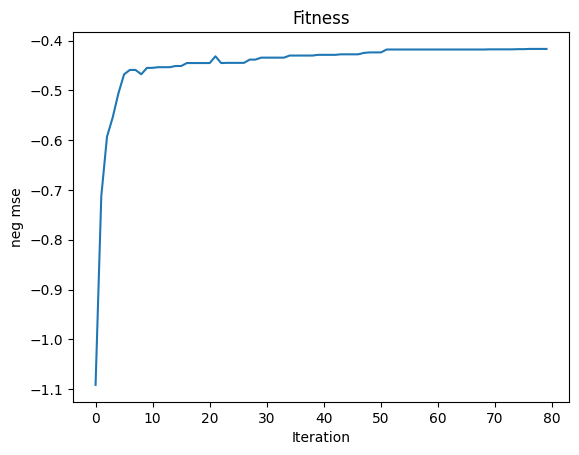

In [280]:
dec.plot_history()

<Axes: xlabel='Wavenumber', ylabel='Intensity'>

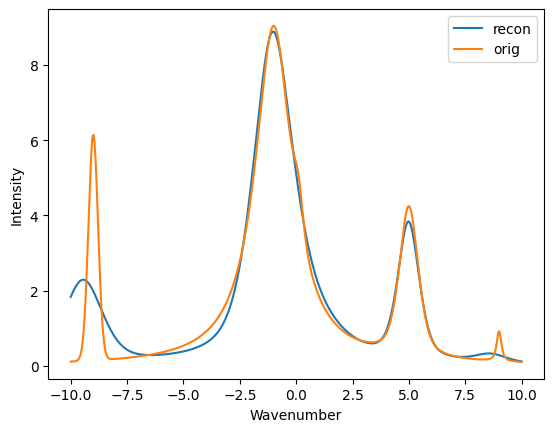

In [282]:
dec.plot_comparison()

In [283]:
dec.reset_fitness_func('reciprocal')
dec.run(200, init=False)

Iteration:   0%|          | 0/200 [00:00<?, ?it/s]

<Axes: title={'center': 'Fitness'}, xlabel='Iteration', ylabel='reciprocal mse'>

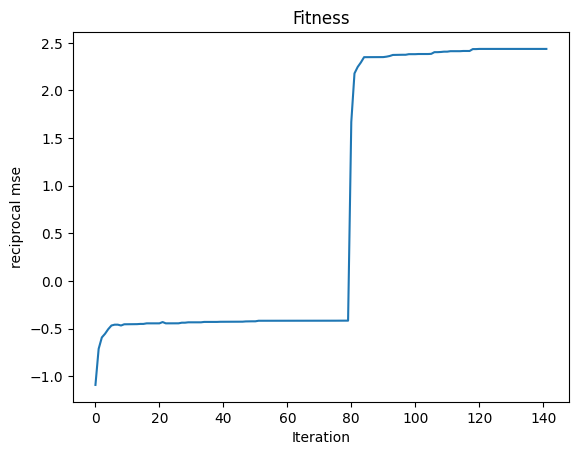

In [284]:
dec.plot_history()

<Axes: xlabel='Wavenumber', ylabel='Intensity'>

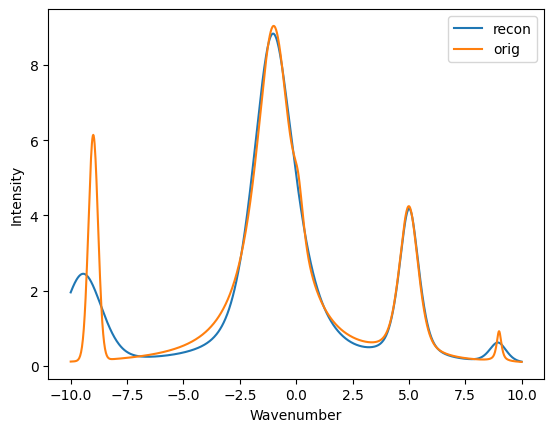

In [285]:
dec.plot_comparison()

In [113]:
pos = torch.tensor([
    [ 10,  2,  3,  4,  5],
    [ 6,  1,  5,  4, 9],
    [-1, 5, 10, 14, 25],
    [0, .25, .5, .75, 1]]
).flatten()[None, :]
x = torch.tensor(np.linspace(-5, 30, 1000))